In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "all_z"
key = "lambda"
quantile = "0"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
if quantile!="":
    i=int(quantile)

In [5]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')

In [6]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [7]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [8]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [9]:
NBINS=10

In [10]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [11]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [12]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [13]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [14]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [15]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

1it [00:00,  3.31it/s]

13it [00:00,  4.67it/s]

25it [00:00,  6.56it/s]

37it [00:00,  9.14it/s]

49it [00:00, 12.62it/s]

61it [00:00, 17.19it/s]

72it [00:00, 22.92it/s]

84it [00:01, 30.08it/s]

96it [00:01, 38.75it/s]

108it [00:01, 48.42it/s]

120it [00:01, 58.84it/s]

132it [00:01, 68.91it/s]

144it [00:01, 73.28it/s]

156it [00:01, 82.68it/s]

168it [00:01, 90.58it/s]

180it [00:01, 97.16it/s]

192it [00:02, 96.09it/s]

204it [00:02, 101.39it/s]

215it [00:02, 102.75it/s]

227it [00:02, 103.80it/s]

239it [00:02, 106.74it/s]

250it [00:02, 106.71it/s]

262it [00:02, 109.99it/s]

274it [00:02, 112.56it/s]

286it [00:02, 107.61it/s]

297it [00:02, 108.21it/s]

308it [00:03, 107.17it/s]

320it [00:03, 110.30it/s]

332it [00:03, 112.36it/s]

344it [00:03, 114.14it/s]

356it [00:03, 115.19it/s]

369it [00:03, 116.57it/s]

381it [00:03, 109.95it/s]

393it [00:03, 112.38it/s]

405it [00:03, 114.33it/s]

417it [00:04, 109.52it/s]

429it [00:04, 111.67it/s]

441it [00:04, 112.76it/s]

453it [00:04, 114.03it/s]

465it [00:04, 112.70it/s]

477it [00:04, 110.13it/s]

489it [00:04, 111.57it/s]

501it [00:04, 112.37it/s]

513it [00:04, 114.06it/s]

525it [00:04, 114.44it/s]

537it [00:05, 106.54it/s]

548it [00:05, 107.47it/s]

559it [00:05, 103.37it/s]

571it [00:05, 105.80it/s]

583it [00:05, 108.82it/s]

595it [00:05, 111.83it/s]

607it [00:05, 113.37it/s]

619it [00:05, 114.08it/s]

631it [00:05, 115.67it/s]

643it [00:06, 116.04it/s]

656it [00:06, 117.20it/s]

668it [00:06, 117.39it/s]

680it [00:06, 117.38it/s]

692it [00:06, 117.98it/s]

704it [00:06, 117.63it/s]

716it [00:06, 116.94it/s]

728it [00:06, 110.81it/s]

740it [00:06, 108.03it/s]

752it [00:07, 107.51it/s]

763it [00:07, 107.01it/s]

776it [00:07, 110.91it/s]

788it [00:07, 112.68it/s]

800it [00:07, 108.72it/s]

812it [00:07, 111.43it/s]

825it [00:07, 114.15it/s]

837it [00:07, 115.51it/s]

849it [00:07, 111.98it/s]

861it [00:07, 113.88it/s]

874it [00:08, 115.90it/s]

886it [00:08, 116.41it/s]

898it [00:08, 114.39it/s]

910it [00:08, 99.96it/s] 

921it [00:08, 99.74it/s]

933it [00:08, 104.68it/s]

945it [00:08, 108.06it/s]

957it [00:08, 111.37it/s]

969it [00:08, 113.30it/s]

981it [00:09, 114.55it/s]

993it [00:09, 114.96it/s]

1005it [00:09, 115.76it/s]

1017it [00:09, 116.43it/s]

1029it [00:09, 116.85it/s]

1041it [00:09, 116.72it/s]

1053it [00:09, 116.59it/s]

1065it [00:09, 113.91it/s]

1077it [00:09, 114.52it/s]

1089it [00:10, 114.79it/s]

1101it [00:10, 115.12it/s]

1113it [00:10, 114.83it/s]

1125it [00:10, 114.54it/s]

1137it [00:10, 114.96it/s]

1149it [00:10, 115.32it/s]

1161it [00:10, 115.55it/s]

1173it [00:10, 115.51it/s]

1185it [00:10, 112.55it/s]

1197it [00:10, 113.69it/s]

1209it [00:11, 112.23it/s]

1221it [00:11, 111.95it/s]

1233it [00:11, 113.39it/s]

1245it [00:11, 114.43it/s]

1257it [00:11, 103.70it/s]

1269it [00:11, 107.32it/s]

1281it [00:11, 110.21it/s]

1293it [00:11, 112.20it/s]

1305it [00:11, 114.01it/s]

1317it [00:12, 114.96it/s]

1329it [00:12, 106.80it/s]

1340it [00:12, 106.27it/s]

1352it [00:12, 107.91it/s]

1363it [00:12, 101.76it/s]

1375it [00:12, 105.49it/s]

1387it [00:12, 107.52it/s]

1399it [00:12, 109.41it/s]

1411it [00:12, 110.35it/s]

1423it [00:13, 110.91it/s]

1435it [00:13, 99.51it/s] 

1447it [00:13, 104.00it/s]

1458it [00:13, 97.84it/s] 

1470it [00:13, 102.83it/s]

1482it [00:13, 107.25it/s]

1494it [00:13, 110.14it/s]

1506it [00:13, 103.86it/s]

1517it [00:13, 101.47it/s]

1530it [00:14, 106.48it/s]

1543it [00:14, 110.24it/s]

1555it [00:14, 112.09it/s]

1567it [00:14, 114.02it/s]

1579it [00:14, 115.06it/s]

1591it [00:14, 115.02it/s]

1603it [00:14, 111.75it/s]

1615it [00:14, 113.20it/s]

1627it [00:14, 114.82it/s]

1639it [00:15, 116.06it/s]

1651it [00:15, 116.48it/s]

1663it [00:15, 116.81it/s]

1675it [00:15, 116.38it/s]

1687it [00:15, 116.44it/s]

1699it [00:15, 115.71it/s]

1711it [00:15, 115.75it/s]

1723it [00:15, 115.76it/s]

1735it [00:15, 115.11it/s]

1747it [00:15, 99.96it/s] 

1758it [00:16, 93.98it/s]

1769it [00:16, 97.27it/s]

1781it [00:16, 101.29it/s]

1793it [00:16, 104.98it/s]

1804it [00:16, 100.32it/s]

1815it [00:16, 99.66it/s] 

1826it [00:16, 91.36it/s]

1837it [00:16, 94.43it/s]

1849it [00:17, 99.29it/s]

1860it [00:17, 98.10it/s]

1872it [00:17, 101.54it/s]

1884it [00:17, 104.78it/s]

1896it [00:17, 108.15it/s]

1908it [00:17, 110.15it/s]

1920it [00:17, 110.26it/s]

1932it [00:17, 110.90it/s]

1944it [00:17, 111.15it/s]

1956it [00:18, 111.66it/s]

1968it [00:18, 103.42it/s]

1979it [00:18, 92.82it/s] 

1989it [00:18, 82.19it/s]

2001it [00:18, 90.70it/s]

2013it [00:18, 97.67it/s]

2025it [00:18, 102.82it/s]

2037it [00:18, 107.01it/s]

2049it [00:18, 110.27it/s]

2061it [00:19, 112.31it/s]

2073it [00:19, 113.88it/s]

2085it [00:19, 114.57it/s]

2097it [00:19, 115.15it/s]

2109it [00:19, 109.84it/s]

2121it [00:19, 112.39it/s]

2134it [00:19, 114.78it/s]

2146it [00:19, 108.39it/s]

2157it [00:19, 107.74it/s]

2169it [00:20, 109.21it/s]

2180it [00:20, 104.52it/s]

2191it [00:20, 104.65it/s]

2202it [00:20, 105.79it/s]

2214it [00:20, 109.50it/s]

2226it [00:20, 112.31it/s]

2238it [00:20, 113.85it/s]

2250it [00:20, 114.30it/s]

2262it [00:20, 115.13it/s]

2274it [00:20, 115.87it/s]

2286it [00:21, 115.58it/s]

2298it [00:21, 115.27it/s]

2310it [00:21, 112.93it/s]

2322it [00:21, 109.20it/s]

2333it [00:21, 99.08it/s] 

2345it [00:21, 104.26it/s]

2357it [00:21, 108.27it/s]

2369it [00:21, 110.43it/s]

2381it [00:21, 112.57it/s]

2393it [00:22, 113.51it/s]

2405it [00:22, 111.24it/s]

2417it [00:22, 112.38it/s]

2429it [00:22, 111.98it/s]

2441it [00:22, 100.99it/s]

2453it [00:22, 105.45it/s]

2466it [00:22, 109.91it/s]

2479it [00:22, 113.25it/s]

2491it [00:22, 114.57it/s]

2504it [00:23, 116.31it/s]

2517it [00:23, 117.50it/s]

2529it [00:23, 117.95it/s]

2541it [00:23, 118.22it/s]

2553it [00:23, 116.81it/s]

2565it [00:23, 117.08it/s]

2577it [00:23, 116.78it/s]

2589it [00:23, 116.37it/s]

2601it [00:23, 116.70it/s]

2613it [00:23, 116.65it/s]

2625it [00:24, 114.58it/s]

2637it [00:24, 114.49it/s]

2649it [00:24, 94.68it/s] 

2660it [00:24, 88.09it/s]

2670it [00:24, 87.10it/s]

2682it [00:24, 93.47it/s]

2694it [00:24, 99.36it/s]

2706it [00:24, 104.08it/s]

2718it [00:25, 107.43it/s]

2730it [00:25, 110.19it/s]

2742it [00:25, 112.44it/s]

2754it [00:25, 112.80it/s]

2766it [00:25, 112.87it/s]

2778it [00:25, 113.28it/s]

2790it [00:25, 113.80it/s]

2802it [00:25, 111.68it/s]

2814it [00:25, 113.39it/s]

2827it [00:25, 115.02it/s]

2839it [00:26, 116.28it/s]

2851it [00:26, 117.05it/s]

2863it [00:26, 117.15it/s]

2875it [00:26, 111.48it/s]

2887it [00:26, 99.83it/s] 

2898it [00:26, 92.37it/s]

2908it [00:26, 87.23it/s]

2917it [00:26, 84.29it/s]

2926it [00:27, 82.59it/s]

2935it [00:27, 79.12it/s]

2946it [00:27, 85.16it/s]

2958it [00:27, 92.05it/s]

2968it [00:27, 86.81it/s]

2977it [00:27, 87.17it/s]

2989it [00:27, 93.44it/s]

3001it [00:27, 99.44it/s]

3013it [00:27, 102.67it/s]

3025it [00:28, 106.89it/s]

3037it [00:28, 110.11it/s]

3049it [00:28, 111.90it/s]

3062it [00:28, 114.22it/s]

3074it [00:28, 114.36it/s]

3086it [00:28, 115.60it/s]

3098it [00:28, 115.55it/s]

3110it [00:28, 115.92it/s]

3122it [00:28, 115.27it/s]

3134it [00:28, 113.62it/s]

3146it [00:29, 113.27it/s]

3158it [00:29, 112.56it/s]

3170it [00:29, 109.62it/s]

3182it [00:29, 111.02it/s]

3194it [00:29, 112.49it/s]

3206it [00:29, 113.80it/s]

3218it [00:29, 105.59it/s]

3230it [00:29, 109.18it/s]

3242it [00:29, 112.01it/s]

3254it [00:30, 113.15it/s]

3266it [00:30, 114.34it/s]

3278it [00:30, 114.08it/s]

3290it [00:30, 101.99it/s]

3302it [00:30, 106.44it/s]

3314it [00:30, 110.06it/s]

3326it [00:30, 112.30it/s]

3338it [00:30, 114.25it/s]

3350it [00:30, 115.31it/s]

3362it [00:31, 115.95it/s]

3374it [00:31, 115.92it/s]

3386it [00:31, 116.62it/s]

3398it [00:31, 116.78it/s]

3410it [00:31, 116.00it/s]

3422it [00:31, 116.12it/s]

3434it [00:31, 116.73it/s]

3446it [00:31, 116.78it/s]

3458it [00:31, 116.65it/s]

3470it [00:31, 116.35it/s]

3482it [00:32, 116.16it/s]

3494it [00:32, 115.69it/s]

3506it [00:32, 108.27it/s]

3518it [00:32, 109.93it/s]

3530it [00:32, 111.41it/s]

3542it [00:32, 112.94it/s]

3554it [00:32, 113.36it/s]

3566it [00:32, 114.30it/s]

3578it [00:32, 115.82it/s]

3590it [00:33, 116.25it/s]

3602it [00:33, 116.20it/s]

3614it [00:33, 116.55it/s]

3626it [00:33, 116.41it/s]

3638it [00:33, 115.20it/s]

3650it [00:33, 114.98it/s]

3662it [00:33, 110.71it/s]

3674it [00:33, 105.45it/s]

3685it [00:33, 97.75it/s] 

3697it [00:34, 102.78it/s]

3710it [00:34, 107.43it/s]

3722it [00:34, 110.82it/s]

3734it [00:34, 111.52it/s]

3746it [00:34, 112.97it/s]

3759it [00:34, 114.90it/s]

3771it [00:34, 114.90it/s]

3783it [00:34, 113.18it/s]

3795it [00:34, 114.88it/s]

3808it [00:34, 116.67it/s]

3820it [00:35, 116.30it/s]

3832it [00:35, 114.75it/s]

3844it [00:35, 115.00it/s]

3856it [00:35, 115.78it/s]

3868it [00:35, 116.51it/s]

3880it [00:35, 116.95it/s]

3892it [00:35, 117.78it/s]

3904it [00:35, 112.72it/s]

3916it [00:35, 114.17it/s]

3928it [00:36, 114.55it/s]

3940it [00:36, 114.84it/s]

3952it [00:36, 115.41it/s]

3964it [00:36, 115.74it/s]

3976it [00:36, 116.35it/s]

3988it [00:36, 116.87it/s]

4001it [00:36, 117.70it/s]

4013it [00:36, 117.45it/s]

4025it [00:36, 116.58it/s]

4037it [00:36, 115.67it/s]

4049it [00:37, 116.64it/s]

4061it [00:37, 97.12it/s] 

4072it [00:37, 86.88it/s]

4083it [00:37, 92.63it/s]

4095it [00:37, 98.94it/s]

4106it [00:37, 93.36it/s]

4116it [00:37, 88.79it/s]

4126it [00:37, 85.38it/s]

4129it [00:37, 108.71it/s]


0it [00:00, ?it/s]

8it [00:00, 75.69it/s]

Number of empty sat catalogs is 7


17it [00:00, 77.93it/s]

26it [00:00, 79.03it/s]

35it [00:00, 80.47it/s]

44it [00:00, 81.32it/s]

53it [00:00, 81.70it/s]

62it [00:00, 82.33it/s]

70it [00:00, 79.97it/s]

80it [00:00, 83.97it/s]

92it [00:01, 91.97it/s]

105it [00:01, 100.00it/s]

117it [00:01, 105.15it/s]

130it [00:01, 110.25it/s]

142it [00:01, 112.06it/s]

155it [00:01, 114.59it/s]

168it [00:01, 116.79it/s]

180it [00:01, 114.48it/s]

193it [00:01, 116.90it/s]

206it [00:02, 117.72it/s]

218it [00:02, 116.55it/s]

231it [00:02, 117.51it/s]

243it [00:02, 116.88it/s]

256it [00:02, 118.92it/s]

269it [00:02, 120.79it/s]

282it [00:02, 121.24it/s]

295it [00:02, 121.34it/s]

308it [00:02, 122.46it/s]

321it [00:02, 123.17it/s]

334it [00:03, 123.68it/s]

347it [00:03, 123.85it/s]

360it [00:03, 124.60it/s]

373it [00:03, 124.33it/s]

386it [00:03, 124.36it/s]

399it [00:03, 124.82it/s]

412it [00:03, 124.18it/s]

425it [00:03, 122.22it/s]

438it [00:03, 123.46it/s]

451it [00:04, 124.07it/s]

464it [00:04, 120.66it/s]

477it [00:04, 118.75it/s]

489it [00:04, 112.89it/s]

502it [00:04, 116.26it/s]

515it [00:04, 118.44it/s]

528it [00:04, 120.24it/s]

541it [00:04, 115.69it/s]

554it [00:04, 118.47it/s]

567it [00:05, 119.86it/s]

580it [00:05, 120.97it/s]

593it [00:05, 122.62it/s]

606it [00:05, 122.16it/s]

619it [00:05, 117.57it/s]

631it [00:05, 117.63it/s]

644it [00:05, 118.48it/s]

656it [00:05, 118.92it/s]

669it [00:05, 120.63it/s]

682it [00:05, 122.60it/s]

695it [00:06, 93.93it/s] 

706it [00:06, 89.56it/s]

716it [00:06, 82.82it/s]

725it [00:06, 84.72it/s]

738it [00:06, 94.23it/s]

749it [00:06, 95.88it/s]

760it [00:06, 98.05it/s]

773it [00:06, 103.90it/s]

786it [00:07, 108.81it/s]

799it [00:07, 112.25it/s]

812it [00:07, 114.70it/s]

825it [00:07, 116.86it/s]

838it [00:07, 118.11it/s]

850it [00:07, 111.54it/s]

863it [00:07, 116.14it/s]

876it [00:07, 119.25it/s]

889it [00:07, 120.84it/s]

902it [00:08, 120.77it/s]

915it [00:08, 121.50it/s]

928it [00:08, 121.35it/s]

941it [00:08, 122.36it/s]

954it [00:08, 120.96it/s]

967it [00:08, 121.27it/s]

980it [00:08, 123.09it/s]

993it [00:08, 106.35it/s]

1005it [00:08, 98.79it/s]

1017it [00:09, 102.29it/s]

1030it [00:09, 107.95it/s]

1043it [00:09, 112.14it/s]

1055it [00:09, 110.08it/s]

1068it [00:09, 114.87it/s]

1080it [00:09, 114.73it/s]

1093it [00:09, 118.14it/s]

1106it [00:09, 120.58it/s]

1119it [00:09, 122.12it/s]

1132it [00:10, 121.98it/s]

1145it [00:10, 123.72it/s]

1158it [00:10, 125.08it/s]

1171it [00:10, 125.98it/s]

1184it [00:10, 126.84it/s]

1197it [00:10, 127.02it/s]

1210it [00:10, 127.51it/s]

1223it [00:10, 127.65it/s]

1237it [00:10, 128.31it/s]

1250it [00:10, 128.41it/s]

1264it [00:11, 128.99it/s]

1277it [00:11, 127.75it/s]

1290it [00:11, 126.97it/s]

1303it [00:11, 107.71it/s]

1315it [00:11, 103.28it/s]

1328it [00:11, 108.54it/s]

1341it [00:11, 113.22it/s]

1353it [00:11, 107.99it/s]

1365it [00:11, 111.33it/s]

1377it [00:12, 108.71it/s]

1390it [00:12, 113.54it/s]

1402it [00:12, 105.34it/s]

1415it [00:12, 111.57it/s]

1428it [00:12, 115.79it/s]

1442it [00:12, 119.82it/s]

1455it [00:12, 122.14it/s]

1468it [00:12, 123.73it/s]

1481it [00:12, 124.72it/s]

1494it [00:13, 126.17it/s]

1508it [00:13, 127.28it/s]

1521it [00:13, 126.85it/s]

1534it [00:13, 127.61it/s]

1547it [00:13, 127.48it/s]

1560it [00:13, 128.09it/s]

1573it [00:13, 127.95it/s]

1586it [00:13, 128.29it/s]

1599it [00:13, 128.55it/s]

1612it [00:13, 128.62it/s]

1625it [00:14, 128.27it/s]

1638it [00:14, 126.32it/s]

1651it [00:14, 125.90it/s]

1664it [00:14, 123.40it/s]

1677it [00:14, 112.62it/s]

1689it [00:14, 106.90it/s]

1702it [00:14, 112.06it/s]

1715it [00:14, 115.04it/s]

1728it [00:14, 118.16it/s]

1741it [00:15, 120.58it/s]

1754it [00:15, 117.93it/s]

1766it [00:15, 114.26it/s]

1779it [00:15, 117.53it/s]

1792it [00:15, 119.17it/s]

1805it [00:15, 121.04it/s]

1818it [00:15, 122.92it/s]

1831it [00:15, 123.52it/s]

1844it [00:15, 124.43it/s]

1857it [00:16, 124.66it/s]

1870it [00:16, 125.06it/s]

1883it [00:16, 124.85it/s]

1896it [00:16, 124.37it/s]

1909it [00:16, 124.52it/s]

1922it [00:16, 125.47it/s]

1935it [00:16, 125.99it/s]

1948it [00:16, 124.99it/s]

1961it [00:16, 113.99it/s]

1973it [00:17, 107.19it/s]

1984it [00:17, 95.77it/s] 

1994it [00:17, 94.35it/s]

2007it [00:17, 102.46it/s]

2020it [00:17, 108.18it/s]

2033it [00:17, 113.18it/s]

2045it [00:17, 110.29it/s]

2058it [00:17, 113.57it/s]

2070it [00:17, 101.25it/s]

2081it [00:18, 92.88it/s] 

2092it [00:18, 97.03it/s]

2103it [00:18, 86.20it/s]

2113it [00:18, 86.22it/s]

2122it [00:18, 86.77it/s]

2134it [00:18, 93.66it/s]

2147it [00:18, 101.60it/s]

2158it [00:18, 96.32it/s] 

2168it [00:19, 87.76it/s]

2180it [00:19, 94.51it/s]

2190it [00:19, 91.34it/s]

2202it [00:19, 98.27it/s]

2213it [00:19, 100.05it/s]

2225it [00:19, 104.48it/s]

2238it [00:19, 109.45it/s]

2251it [00:19, 113.28it/s]

2263it [00:19, 111.00it/s]

2276it [00:20, 114.46it/s]

2289it [00:20, 118.48it/s]

2302it [00:20, 119.82it/s]

2315it [00:20, 119.73it/s]

2328it [00:20, 119.72it/s]

2341it [00:20, 120.24it/s]

2354it [00:20, 119.53it/s]

2366it [00:20, 115.37it/s]

2379it [00:20, 117.33it/s]

2391it [00:20, 118.06it/s]

2404it [00:21, 119.91it/s]

2417it [00:21, 121.56it/s]

2430it [00:21, 122.13it/s]

2443it [00:21, 121.47it/s]

2456it [00:21, 122.15it/s]

2469it [00:21, 124.16it/s]

2482it [00:21, 125.69it/s]

2495it [00:21, 125.97it/s]

2508it [00:21, 117.84it/s]

2521it [00:22, 119.78it/s]

2534it [00:22, 118.45it/s]

2546it [00:22, 117.01it/s]

2558it [00:22, 111.21it/s]

2570it [00:22, 113.59it/s]

2583it [00:22, 117.72it/s]

2595it [00:22, 115.68it/s]

2607it [00:22, 116.87it/s]

2619it [00:22, 116.19it/s]

2631it [00:23, 100.31it/s]

2642it [00:23, 101.20it/s]

2654it [00:23, 105.03it/s]

2665it [00:23, 86.66it/s] 

2678it [00:23, 95.03it/s]

2691it [00:23, 101.65it/s]

2704it [00:23, 107.87it/s]

2717it [00:23, 112.05it/s]

2729it [00:23, 102.80it/s]

2740it [00:24, 96.67it/s] 

2751it [00:24, 100.24it/s]

2762it [00:24, 101.29it/s]

2773it [00:24, 93.25it/s] 

2785it [00:24, 98.42it/s]

2798it [00:24, 105.44it/s]

2809it [00:24, 96.83it/s] 

2820it [00:24, 94.34it/s]

2833it [00:25, 101.14it/s]

2844it [00:25, 99.42it/s] 

2857it [00:25, 105.33it/s]

2868it [00:25, 95.84it/s] 

2881it [00:25, 103.58it/s]

2894it [00:25, 109.66it/s]

2907it [00:25, 113.78it/s]

2919it [00:25, 104.46it/s]

2931it [00:25, 107.08it/s]

2944it [00:26, 112.46it/s]

2957it [00:26, 116.12it/s]

2970it [00:26, 116.75it/s]

2982it [00:26, 104.91it/s]

2995it [00:26, 109.34it/s]

3008it [00:26, 113.43it/s]

3021it [00:26, 116.71it/s]

3034it [00:26, 119.30it/s]

3047it [00:26, 117.19it/s]

3059it [00:27, 100.20it/s]

3070it [00:27, 95.56it/s] 

3083it [00:27, 103.08it/s]

3096it [00:27, 109.66it/s]

3109it [00:27, 114.48it/s]

3122it [00:27, 117.98it/s]

3135it [00:27, 120.38it/s]

3148it [00:27, 122.05it/s]

3161it [00:27, 119.27it/s]

3174it [00:28, 121.05it/s]

3187it [00:28, 122.47it/s]

3200it [00:28, 122.51it/s]

3213it [00:28, 124.00it/s]

3226it [00:28, 125.19it/s]

3239it [00:28, 125.58it/s]

3252it [00:28, 126.10it/s]

3265it [00:28, 103.57it/s]

3277it [00:29, 98.00it/s] 

3289it [00:29, 101.79it/s]

3302it [00:29, 108.50it/s]

3316it [00:29, 114.05it/s]

3329it [00:29, 117.13it/s]

3341it [00:29, 113.07it/s]

3353it [00:29, 112.50it/s]

3366it [00:29, 116.45it/s]

3379it [00:29, 119.34it/s]

3392it [00:29, 121.08it/s]

3405it [00:30, 121.40it/s]

3418it [00:30, 121.76it/s]

3431it [00:30, 122.45it/s]

3444it [00:30, 122.92it/s]

3457it [00:30, 107.07it/s]

3470it [00:30, 112.42it/s]

3483it [00:30, 115.76it/s]

3496it [00:30, 116.99it/s]

3508it [00:30, 115.47it/s]

3521it [00:31, 119.04it/s]

3534it [00:31, 121.76it/s]

3547it [00:31, 116.75it/s]

3560it [00:31, 118.62it/s]

3572it [00:31, 117.23it/s]

3585it [00:31, 118.50it/s]

3598it [00:31, 119.43it/s]

3611it [00:31, 120.25it/s]

3624it [00:31, 120.68it/s]

3637it [00:32, 118.04it/s]

3650it [00:32, 119.69it/s]

3662it [00:32, 119.29it/s]

3674it [00:32, 118.71it/s]

3687it [00:32, 116.55it/s]

3699it [00:32, 105.20it/s]

3710it [00:32, 98.57it/s] 

3721it [00:32, 94.25it/s]

3734it [00:32, 102.17it/s]

3747it [00:33, 108.19it/s]

3760it [00:33, 113.23it/s]

3773it [00:33, 116.52it/s]

3786it [00:33, 119.21it/s]

3799it [00:33, 120.30it/s]

3812it [00:33, 121.51it/s]

3825it [00:33, 118.64it/s]

3838it [00:33, 120.71it/s]

3851it [00:33, 122.57it/s]

3864it [00:34, 123.30it/s]

3877it [00:34, 123.73it/s]

3890it [00:34, 124.31it/s]

3903it [00:34, 116.50it/s]

3916it [00:34, 118.60it/s]

3929it [00:34, 118.05it/s]

3941it [00:34, 116.67it/s]

3953it [00:34, 106.05it/s]

3965it [00:34, 107.99it/s]

3978it [00:35, 111.33it/s]

3992it [00:35, 116.49it/s]

4005it [00:35, 118.88it/s]

4018it [00:35, 120.87it/s]

4031it [00:35, 113.27it/s]

4043it [00:35, 103.44it/s]

4054it [00:35, 96.92it/s] 

4065it [00:35, 98.70it/s]

4078it [00:35, 105.35it/s]

4090it [00:36, 109.34it/s]

4103it [00:36, 110.36it/s]

4115it [00:36, 110.16it/s]

4128it [00:36, 114.25it/s]

4129it [00:36, 113.49it/s]

Number of empty sat catalogs is 7


In [16]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [17]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [18]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [19]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

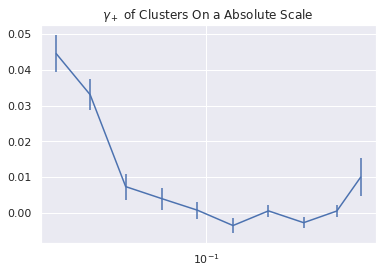

Aggregated xi:
[-19.8734 -28.1092 -10.1818  -8.6018  -2.7629  21.3393  -4.4679  27.6829
  -3.9609  -8.2841]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1926.9968  -3285.2445  -4711.3501  -6299.936   -9335.0439 -11568.9223
 -12527.9275  -9879.4591  -4430.8501   -187.9415]
------------------------------------------------------------------------------
Aggregated npairs:
[ 446.  850. 1391. 2170. 3853. 5953. 8543. 9950. 8109.  831.]
------------------------------------------------------------------------------
Mean xi:
[-0.0446 -0.0331 -0.0073 -0.004  -0.0007  0.0036 -0.0005  0.0028 -0.0005
 -0.01  ]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3206 -3.865  -3.387  -2.9032 -2.4228 -1.9434 -1.4665 -0.9929 -0.5464
 -0.2262]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

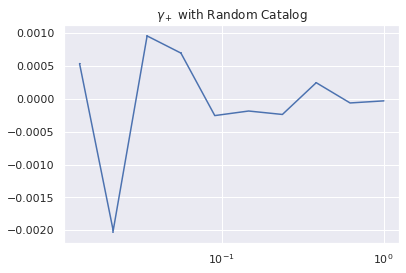

[ 5.3807e-04 -2.0032e-03  9.5860e-04  6.9755e-04 -2.5362e-04 -1.8407e-04
 -2.3639e-04  2.4706e-04 -6.1347e-05 -2.9438e-05]
[-8.3736e-06  3.1174e-05 -1.4918e-05 -1.0856e-05  3.9469e-06  2.8646e-06
  3.6787e-06 -3.8449e-06  9.5470e-07  4.5812e-07]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

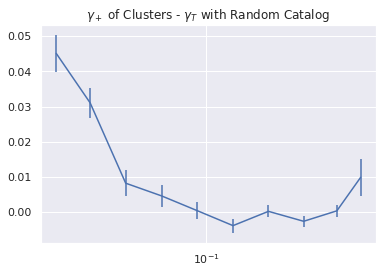

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

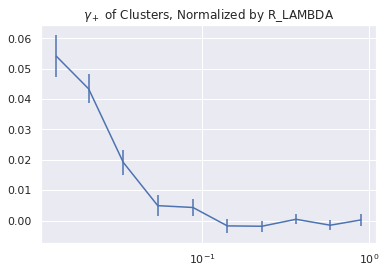

Aggregated xi:
[-10.6146 -25.8639 -19.6456  -7.8193 -11.4338   7.8208  12.6242  -3.8099
  15.452   -1.0777]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -844.5105 -2302.7127 -3471.4453 -4635.9061 -6444.2284 -8698.5864
 -9951.4163 -9209.0657 -5406.6303  -681.1263]
------------------------------------------------------------------------------
Aggregated npairs:
[  196.   596.  1025.  1592.  2655.  4451.  6727.  9128. 10074.  5747.]
------------------------------------------------------------------------------
Mean xi:
[-0.0542 -0.0434 -0.0192 -0.0049 -0.0043  0.0018  0.0019 -0.0004  0.0015
 -0.0002]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3087 -3.8636 -3.3868 -2.912  -2.4272 -1.9543 -1.4793 -1.0089 -0.5367
 -0.1185]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)